# Monitor Analysis

In the last notebook I detailed how I am approaching the process of making a data driven decision to select a new computer monitor. I scraped the data from the web and processed it to build a pandas dataframe with different monitors as rows and monitor features as columns. The processing was not complete, with several columns left as unusable object data types, but I will be using this notebook to perform those transformations as needed. The last notebook was focused on getting the data and putting it into a rough form, and this notebook is focused on taking that rough form and converting it into an actionable, data driven decision. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib notebook
%matplotlib inline

In [2]:
sns.set_theme(context='notebook', style='darkgrid', 
                  palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)

df = pd.read_csv('monitor_project.csv', index_col=0)
df.head(1)

,model_name,model_title,price,rating_count,avg_rating,Screen Size,Color Gamut (Typ.),Aspect Ratio,Display Resolution,Resolution,...,1ms Motion Blur Reduction,Display Type,Super Resolution+,Curved,freesync,freesync_premium,freesync_premium_pro,HDR,response_time_ms,refresh_rate(hz)
0,27UP650-W,LG 27” UHD IPS Monitor with VESA DisplayHDR 40...,450.0,0.0,NaN,27.0,DCI-P3 95% (CIE1976),16:9,UHD,3840 x 2160,...,0,IPS,0,0,1,0,0,1,5,60


In [3]:
df.info()
df.drop('Headphone Out', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   model_name                      20 non-null     object 
 1   model_title                     20 non-null     object 
 2   price                           20 non-null     float64
 3   rating_count                    20 non-null     float64
 4   avg_rating                      14 non-null     float64
 5   Screen Size                     20 non-null     float64
 6   Color Gamut (Typ.)              20 non-null     object 
 7   Aspect Ratio                    20 non-null     object 
 8   Display Resolution              20 non-null     object 
 9   Resolution                      20 non-null     object 
 10  Brightness                      20 non-null     object 
 11  Contrast Ratio                  20 non-null     object 
 12  Surface Treatment               17 non

## First exploratory plot
I put together this graph as a way to tie in several elements that are important to my selection across all of the monitors in my dataset to get an overview of the selection field. For this overview I chose to use screen size vs price instead of average review vs price for the simple reason that not all monitors had reviews and I want this overview to show the entire selection field. 

Right away we can see by the price positioning that there is at least one major outlier that is going to disrupt my data analyzation and the Hue of that monitor gives us a good idea why. At \\$4000, the monitor in question is more than double the price of the next most expensive monitor, and that is likely because it is the only monitor in the group that uses a brand new [panel technology](https://www.oled-info.com/oled-monitor) that is expensive across other brands as well. I have no intention to even consider spending \\$4k for a monitor so I am going to drop this monitor to avoid having it skew the value of the metrics across the other monitors. 

A second, semi-outlier is by screen size. At 49", this monitor is almost 30% bigger than the next biggest monitor. While I also have no intention of getting a monitor that is wider than my current desk, it seems like this monitor might actually be underpriced for what it offers and wont skew my attempts to capture price values for different features in the way that the first outlier will. And, with only 19 monitors left, I dont want to get rid of another data point unless I have to, so I will keep this one for now.

One interesting point is that none of these regression lines pass through the origin as you would expect in a pure linear relationship. In fact, the last graph intersects at less than -$2000! Obviously buying a tiny screen doesnt result in a negative payment, but [this article](https://dynamicecology.wordpress.com/2017/04/13/dont-force-your-regression-through-zero-just-because-you-know-the-true-intercept-has-to-be-zero/) does a great job of making the argument that a good linear regression model really only needs to be accurate over the range of values that are in consideration, since in reality there are more factors at play that a simple regression cant hope to accurately capture. 

Graph 0 intersects y axis at -$1,347
Graph 1 intersects y axis at -$1,250
Graph 2 intersects y axis at -$2,097


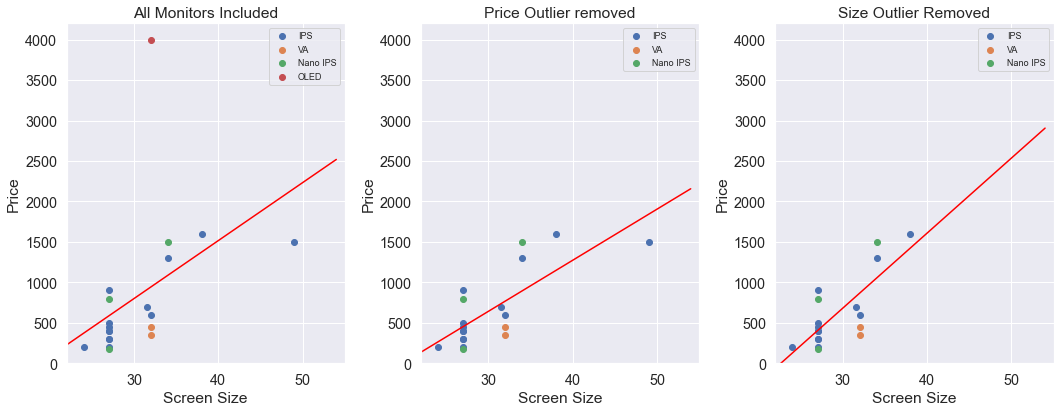

In [4]:
price_outlier_removed = df.drop(15, axis=0).copy()
size_outlier_removed = df.drop([15,17], axis=0).copy()

list_of_dfs = [df, price_outlier_removed, size_outlier_removed]
list_of_titles = ['All Monitors Included',
                  'Price Outlier removed', 
                  'Size Outlier Removed']

def overview_chart(df_list):
    """plot screen size vs Price scatter charts for monitor dataframes with regression line and panel types broken out"""

    n_plots = len(df_list)
    fig = plt.figure(figsize=(15,6))
    
    #loop to create charts for each df in entered list of dfs
    for i, df in enumerate(df_list):
        #breaking out display types to plot them with different colored markers
        display_types = list(df['Display Type'].unique())
        #subplots 1 row, with x cols
        plt.subplot(1,n_plots,i+1)
        # using loop to plot each display type separately for each df
        for d_type in display_types:
            mask = df['Display Type']==d_type
            plt.scatter(x=df['Screen Size'][mask], y=df['price'][mask], label=d_type)
            plt.xlabel('Screen Size')
            plt.ylabel('Price')
            plt.title(list_of_titles[i])
        # draw regression line (only one needed per df chart)
        x = df['Screen Size']
        y = df['price']
        m, b = np.polyfit(x, y, 1)
        a = np.arange(22,55,1)
        plt.plot(a, m*a + b, color='red')
        plt.xlim(22,55)
        plt.ylim(0,4200)
        plt.legend(fontsize='xx-small')
        print(f'Graph {i} intersects y axis at -${-b:,.0f}')
    plt.tight_layout()
    plt.show()
    
overview_chart(list_of_dfs)

In [5]:
#removing the outlier monitor and saving to new df

data = df.drop(15, axis=0).reset_index(drop=True).copy()
data.shape

(19, 40)

Next thoughts

- describe in depth what I am looking for in the "best" monitor. 
    - I want a monitor with good clarity, and features to make it easier on my eyes
    - I want a monitor that provides me with more screen room so that I dont have to scroll and switch tabs as much
        - right now I think that means both height and width (ie not an UW monitor) but value is a bigger factor
    - I would like a monitor with speakers for listening to you tube videos
    - I want to pay as little as possible:
        - I dont need gaming performance features
        - I dont need high performance color range or accuracy
        - I dont need a "huge" monitor or extra features
    
- find measures of tendencies. 
    - what do these columns really mean? 
    - how do they relate to my requirements?
    - how do they relate to the things that I care about for defining "best"?  (if measure goes up is it more "best"?)

- look at feature distributions, histograms, quartile performances, measures of spread (std)
- maybe compare total actual screen area (HxW) to see how ratio affects price. 
- compare measures of clarity for UW vs regular aspect monitors, see if clarity is more expensive in one 

# Defining my criteria
Now that I have my data compiled and and cleaned to a useable state, I need to define what I am looking for in a new monitor so that my analysis can be directed towards identifying metrics that can measure the degree to which each monitor meets my needs. The main thing that made me want a new monitor is that my current monitor hurts my eyes after working on it for a long period of time. It is important that my new monitor is easy on my eyes. My current monitor is also on the small side. At only 23.5" diagonally, I find myself having to scroll up and down quite a bit as I build project notebooks, and my screen gets crowded quickly if I want to have more than 1 window open at a time. It is important that my new monitor has a large workspace. My current setup uses my laptop speakers, so whenever I play a YouTube video the sound is coming from beside me and is a little muffled since my laptop is closed. I can always get external speakers so this isnt a deal breaker, but it would be nice if my new monitor had built-in speakers. Lastly, while I am sure the most expensive monitors would meet my needs, I am operating on a budget so I want to find the least expensive monitor that sufficiently meets my needs. It is important that my new monitor is affordable. So here are my four criteria, in order of importance:
1. Easy on my eyes
2. Large workspace
3. Affordably priced
4. Built-in speakers

Also worth noting is that there are a few things that are NOT important to me, and that avoiding those features might help me meet my 3rd objective. A number of monitors are designed to be optimized for either gaming experience or professional graphics production through features that make the monitor perform well with on-screen motion or high accuracy of color reproduction. Since I dont use my computer for gaming or art, I can hopefully save money by finding a monitor that does not have those unneeded extra features.

### 1st Critera: Easy on my eyes

I am going to need a way to measure eye strain for each monitor so that I can compare them. While there there are a few features here that are discrete, like surface treatment or flicker free, that will need to be considered on a case basis, I would like to have a continuous variable to measure the clarity of each monitor. After some [research](https://www.viewsonic.com/library/tech/monitor-resolution-aspect-ratio/), I have found that either pixels per square inch (PPI$^{2}$), or pixel pitch are good methods to measure the clarity of a monitor and can be [derived](https://www.calculatorsoup.com/calculators/technology/ppi-calculator.php) from the data that I have. PPI$^{2}$ is the number of pixels inside a square inch of the monitor, the higher the number is the more clear the screen appears. Pixel pitch is a measurement of the distance between pixels in millimeters, so the lower the number, the closer the pixels are together and the more clear the screen appears. Either of these values is more important than the pixel count or resolution, since a bigger screen will effectively appear less clear than a smaller screen with the same resolution. PPI and pixel pitch consider both screen size AND pixel count in one measure. 

Both contrast and brightness are ordinal variables that can impact eye strain, so I will make those values useable as well. Although curved monitors are [marketed](https://www.viewsonic.com/library/tech/best-monitors-eye-strain/) as reducing eye strain, the least expensive one starts beyond my price range so I will not be including that here. The display type and color accuracy will not affect eye strain and will not be considered. Other brands also feature Blue light filters, and auto-dimming or auto-brightness adjustments, features that might be worth looking into. 


#### Building columns for PPI$^{2}$ and pixel pitch.
Pixel pitch was included in the data, but I calculated it anyway just to double check the data. They are close enough, but I am going to go with my number since I know how it was derived. 

In [6]:
# measurements for clarity, PPI squared and pixel pitch

def calculate_multiplier(row):
    """calculate ratio multiplier from aspect ratio"""
    width = int(row.split(':')[0])
    height = int(row.split(':')[1])
    return width/height

def calculate_pixels(value):
    """calculate total pixels from Resolution"""
    width_pixels = value.split('x')[0]
    height_pixels = value.split('x')[1]
    return int(width_pixels) * int(height_pixels)

def pixel_diagonal(resolution):
    """Calculating the number of pixels on the screen diagonal from the resolution column"""
    width_pixels = resolution.split('x')[0]
    height_pixels = resolution.split('x')[1]
    pixel_diag = np.sqrt(int(width_pixels)**2 + int(height_pixels)**2)
    return pixel_diag

data['aspect_multiplier'] = data['Aspect Ratio'].map(calculate_multiplier)

# columns for width and height in inches
data['height'] = np.sqrt((data['Screen Size']**2) / (1 + (data['aspect_multiplier']**2)))
data['width'] = data['height'] * data['aspect_multiplier']

# column for screen square inches
data['screen_area'] = data['height'] * data['width']


# column for pixel count
data['pixel_count'] = data['Resolution'].apply(calculate_pixels)

# column for PPI squared
data['ppi_sq'] = (data['pixel_count'] / data['screen_area']).astype(int)

# column for diagonal pixel count
data['pixel_diag'] = data['Resolution'].apply(pixel_diagonal)

# column for pixel pitch
data['pitch_mm'] = round((data['Screen Size'] * 25.4) / (data['pixel_diag']),3)

# column for pixels per inch (linear), a more industry standard measurement
data['ppi'] = np.sqrt(data['ppi_sq']).astype(int)

data[['Pixel Pitch (mm)','pitch_mm', 'ppi_sq', 'ppi']].head()

,Pixel Pitch (mm),pitch_mm,ppi_sq,ppi
0,0.155,0.156,26627,163
1,0.181,0.184,18956,137
2,0.181,0.184,18956,137
3,0.233,0.233,11834,108
4,0.272,0.277,8425,91


#### Building columns for contrast and brightness
Converting both columns into an ordinal integer for easy comparison. Higher brightness and higher contrast values are better for being able to reduce eye strain. 

In [7]:
# using regex to return (Typ) brightness 
pattern = r"(\w+) ?(?=\([Tt]yp?\))"
data['brightness'] = data['Brightness'].str.replace('.', '', regex=False).copy()
data['brightness'] = data['brightness'].str.extract(pattern, expand=False)
# filling in missing values with old brightness column
data['brightness'].fillna(data['Brightness'], inplace=True)

# removing extra letters
def clean_brightness(value):
    value = value.split('c')[0]
    value = value.split('n')[0]
    return int(value)
    
data['brightness'] = data['brightness'].map(clean_brightness)    

# using regex to return (Typ) contrast
pattern = r"(\w+):\w+ ?(?=\(Typ\))"
data['contrast:1'] = data['Contrast Ratio'].str.replace('.', '', regex=False).copy()
data['contrast:1'] = data['contrast:1'].str.extract(pattern, expand=False)

# replacing missing data
data['contrast:1'].fillna(data['Contrast Ratio'], inplace=True)

def clean_contrast(row):
    return int(row.split(':')[0])

# cleaning replaced data
data['contrast:1'] = data['contrast:1'].map(clean_contrast)


#### "Retina" rating 
While I was trying to unpack the utility of using pixel density to measure eye strain, I came across the concept of viewing distance as it relates to ppi. Apple coined the term "retina" monitor to refer to an "ideal" pixel density to viewing distance ratio. Since, at some distance the human eye will no longer be able to distinguish individual pixels for a given pixel density, there are diminishing returns making the pixels more dense. On the other hand, the more densely the pixels are packed per square inch, the more closely you can view the screen without the eye strain caused by pixelation. Using [posted ratios](https://www.displayninja.com/what-is-pixel-density/), I estimated the "retina" distance formula to be:

Viewing Distance in inches = $\bigg(\frac{3450}{PPI}\bigg)$

Using this formula I found that the "ideal" viewing distance for my current monitor with 93 PPI is about 37 inches! Given that I typically sit about 25 inches from my screen, having a monitor with 138ppi or higher would be ideal. I will factor this concept into my decision making process, but it will have to be balanced against the other decision factors.  


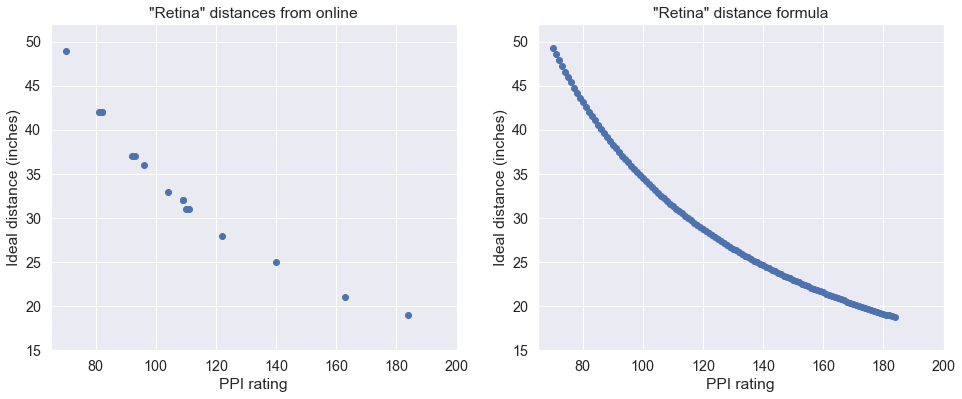

In [8]:
# this is the data set that I derived my equation to calculate "retina" viewing distance from PPI
ppi = [70,81,82,82,92,93,96,104,109,109,110,111,122,140,163,184]
viewing_dist_inches = [49,42,42,42,37,37,36,33,32,32,31,31,28,25,21,19]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(ppi, viewing_dist_inches)
plt.xlim(65,200)
plt.ylim(15,52)
plt.xlabel('PPI rating')
plt.ylabel('Ideal distance (inches)')
plt.title('"Retina" distances from online')

# formula for converting ppi to viewing distance in inches
plt.subplot(1,2,2)
x = np.arange(70,185,1)
y =  (3450/x) 
plt.scatter(x,y)
plt.xlim(65,200)
plt.ylim(15,52)
plt.xlabel('PPI rating')
plt.ylabel('Ideal distance (inches)')
plt.title('"Retina" distance formula')

plt.show()

In [9]:
# adding "retina" viewing distance column
data['viewing_distance_inches'] = (3450 / data['ppi']).astype(int)

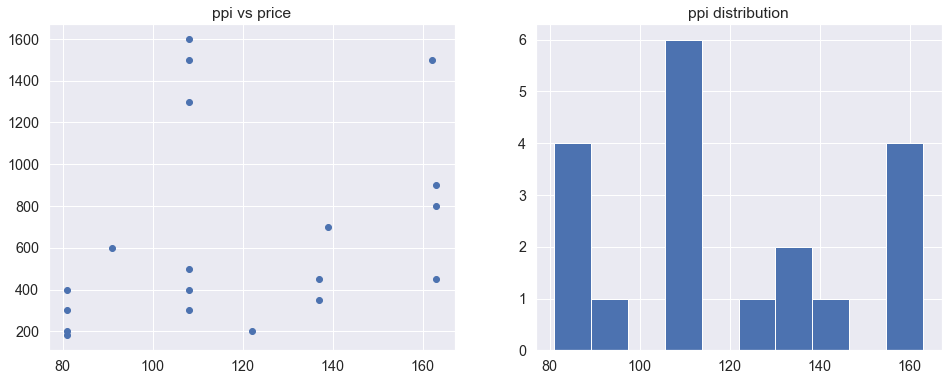

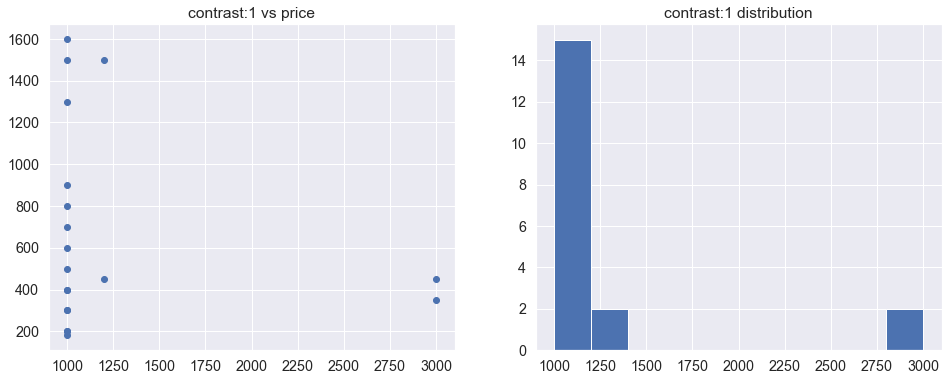

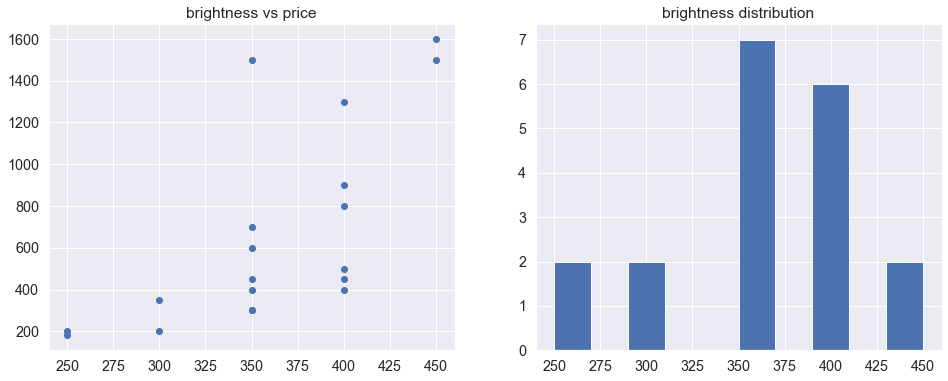

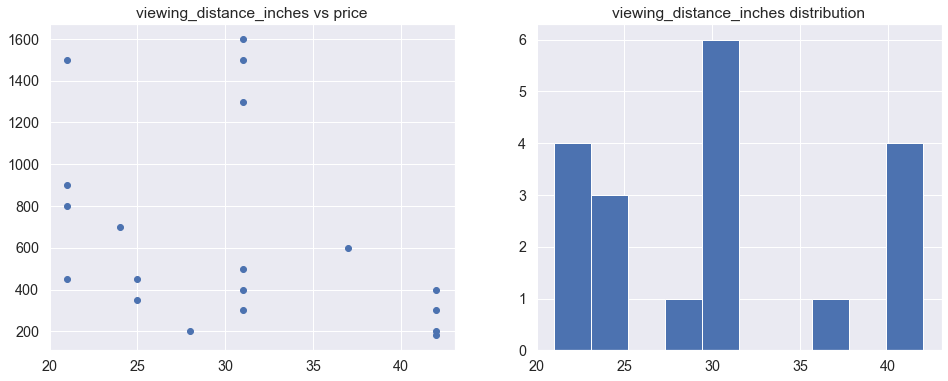

In [10]:
# a few summary graphs for the columns generated in this section
cols = ['ppi', 'contrast:1', 'brightness', 'viewing_distance_inches']

for col in cols:
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.scatter(data[col], data['price'])
    plt.title(f'{col} vs price')
    plt.subplot(1,2,2)
    plt.hist(data[col])
    plt.title(f'{col} distribution')
    plt.show()

### 2nd Critera: Large Workspace
This criteria is pretty straightforward, largeness can easily be quantified by a metric I have already generated, the screen area in square inches. However, with the rising popularity of wide and ultra-wide screens, there are now different aspect configurations that result in the same screen area. While these widescreen monitors might be available at lower price points with different manufacturers, we can see at a glance below that the wide screen aspect, seems to be correlated with a significant jump in price. 


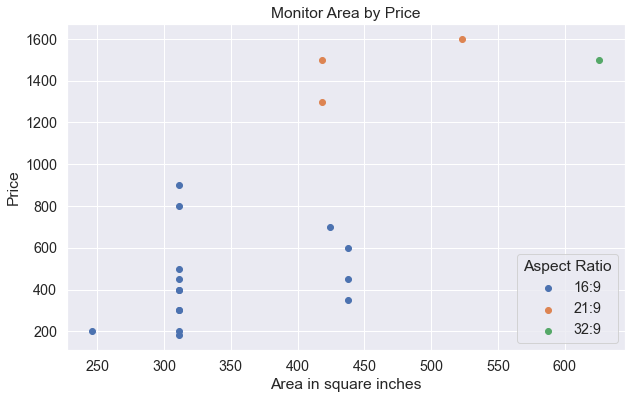

In [11]:
plt.figure(figsize=(10,6))
for size in data['Aspect Ratio'].unique():
    mask = data['Aspect Ratio']==size
    plt.scatter(data['screen_area'][mask], data['price'][mask], label=size)
plt.legend(title='Aspect Ratio', loc=4)
plt.title('Monitor Area by Price')
plt.ylabel('Price')
plt.xlabel('Area in square inches')
plt.show()

### 3rd Critera: Affordably priced
Since my chief metrics so far are ppi and square inches of screen area, I have decided to use a simple vector addition with price ratios for each metric as a way to compare how much of my desired features are being delivered per dollar. The formula is:

$Value Index = \frac{PPI}{Price} + \frac{Inches^{2} Screen Area}{Price}$

The resulting index will still need to be filtered to make sure that it meets my minimum standards for the other criteria, but this index will at least arrange the monitors in order of purchase value. 

In [12]:
# creating value index
data['value_index'] = (data['screen_area'] / data['price']) + (data['ppi'] / data['price'])
data[['model_name','price', 'Screen Size', 'ppi', 'value_index',
      'viewing_distance_inches']].sort_values('value_index', ascending=False).head()

,model_name,price,Screen Size,ppi,value_index,viewing_distance_inches
6,27MP60G-B,179.99,27.0,81,2.180685,42
8,27ML600M-B,199.99,27.0,81,1.962606,42
7,24QP500-B,199.99,24.0,122,1.840715,28
1,32UL500-W,349.99,32.0,137,1.641632,25
11,27GN800-B,299.99,27.0,108,1.398385,31


The first three monitors might offer good value, but they dont meet my other criteria. 1 and 2 have a viewing distance that is farther away than my current monitor, and 3 is the same size as my current monitor. 4 seems like it might be a winner, but we arent done yet!

### 4th Criteria: Built-in speakers
With everything else in place, all that is left to do is overlay a filter to see if there is a monitor in the list that has speakers that meets my criteria. 


In [13]:
speaker_filter = data['Speaker']==1
data[speaker_filter].sort_values('value_index', ascending=False)

,model_name,model_title,price,rating_count,avg_rating,Screen Size,Color Gamut (Typ.),Aspect Ratio,Display Resolution,Resolution,...,screen_area,pixel_count,ppi_sq,pixel_diag,pitch_mm,ppi,brightness,contrast:1,viewing_distance_inches,value_index
1,32UL500-W,32” UHD HDR10 Monitor with AMD FreeSync™,349.99,25.0,4.6,32.0,DCI-P3 95% (CIE1976),16:9,4K,3840 x 2160,...,437.554896,8294400,18956,4405.814340,0.184,137,300,3000,25,1.641632
2,32UP550-W,LG 32'' UHD HDR Monitor with USB-C Connectivit...,450.00,0.0,NaN,32.0,DCI-P3 90% (CIE1976),16:9,UHD,3840 x 2160,...,437.554896,8294400,18956,4405.814340,0.184,137,350,3000,25,1.276789
14,32UN880-B,LG 32UN880-B 32 Inch UltraFine™ Display Ergo 4...,699.99,53.0,4.3,31.5,DCI-P3 95% (CIE1976),16:9,4K,3840 x 2160,...,423.988131,8294400,19562,4405.814340,0.182,139,350,1000,24,0.804280
16,49WL95C-W,LG 49WL95C-W 49 Inch 32:9 UltraWide Dual QHD I...,1499.99,71.0,4.2,49.0,sRGB 99% (CIE1931),32:9,UW-DQHD,5120 x 1440,...,625.780995,7372800,11781,5318.646444,0.234,108,350,1000,31,0.489191
17,38WN95C-W,LG 38WN95C-W 38 Inch UltraWide QHD+ IPS Curved...,1599.99,37.0,4.4,38.0,DCI-P3 98% (CIE1976),21:9,UW-QHD,3840 x 1600,...,522.827586,6144000,11751,4160.000000,0.232,108,450,1000,31,0.394270


Below are the monitors

[32UL500-W](https://www.lg.com/us/monitors/lg-32ul500-w-4k-uhd-monitor#) - marketed as a mix use, design, gaming and viewing

[32UP550-W](https://www.lg.com/us/monitors/lg-32up550-w-4k-uhd-led-monitor) - marketed for gaming

[32UN880-B](https://www.lg.com/us/monitors/lg-32un880-b-4k-uhd-led-monitor) - marketed for designers

[49WL95C-W](https://www.lg.com/us/monitors/lg-49WL95C-W-ultrawide-monitor) - marketed for professional use 

[38WN95C-W](https://www.lg.com/us/monitors/lg-38wn95c-w-ultrawide-monitor) - marketed as the ultimate mixed use monitor 

# Conclusion

While those last two monitors look amazing, the first monitor on this list looks like it is going to meet all of the criteria that I originally specified according to the metrics that I was able to create through this project, and it is priced well within an acceptable price range for my work equipment budget. Although I wasn't able to incorporate some of the statistical methods for analysis that I was hoping to use due to a shallow subject pool, this project covered a lot of ground, here are some of the highlights:
- Sourcing feature rich data from a scraping friendly website
- Built custom web scraper to download over 50 features for 20 different monitors using functional programming to minimize error and maximize repeatability.
- Programatically cleaned and condensed almost 200 columns to about 40, eliminating redundancies, spelling errors, non-related information, and converting information to useable forms.
- Defined the characteristics of the monitor that I wanted, and then turned those characteristics into measureable metrics based on domain research to enable data driven decision making. 
- Carried out a thorough, objective analysis and delivered a fully satisfactory result. 

#### Afterward:
As I was concluding this project I accidentally discovered that LG has an entire selection of monitors that are aimed at small businesses and are more likely to be designed to meet my needs. Furthermore, as I explored the LG website I discovered that my webscraping hadnt captured all of the monitors available, some of them were hidden behind a "view-all" HTML tag. I have since figured out how to get access to both the business monitors and the rest of the of "hidden" monitors and now have nearly 200 monitors to run analysis with. However, the messy data became even messier and produced over 500 columns filled with redundancy, spelling errors and formatting issues. I will probably end up re-running a lot of this same analysis, but much more streamlined since I have a better idea which metrics are important and already have a lot of the programming in place for them. 